### Q1

In [1]:
import scipy.stats as stats

# Given data
mean = 50
std_dev = 5
n = 30  # Assume a sample size of 30
confidence_level = 0.95

# Calculate the margin of error
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-critical value
margin_of_error = z_score * (std_dev / (n ** 0.5))

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


95% Confidence Interval: (48.21, 51.79)


### Q2

To conduct a Chi-Square Goodness of Fit test in Python, we compare the observed distribution of colors in a bag of M&Ms to the expected distribution. The Chi-Square test checks if there is a significant difference between the observed and expected frequencies.

Steps for the Chi-Square Test:
#Define the observed frequencies: the actual counts of each color of M&Ms in a bag.
#Define the expected frequencies: based on the given expected percentages.
#Use the Chi-Square formula:
𝜒
2
=
∑
(
𝑂
𝑖
−
𝐸
𝑖
)
2
𝐸
𝑖
χ
2
 =∑
E
i
​

(O
i
​
 −E
i
​
 )
2

​

#where
𝑂
𝑖
O
i
​
  = observed frequency,
𝐸
𝑖
E
i
​
  = expected frequency.
Compare the calculated
𝜒
2
χ
2
  statistic with the critical value or p-value at the 0.05 significance level.

In [2]:
from scipy.stats import chisquare

# Observed frequencies (replace with actual counts from your M&Ms bag)
observed_frequencies = [22, 18, 20, 12, 8, 20]  # Example counts: blue, orange, green, yellow, red, brown

# Expected frequencies (based on 20% blue, 20% orange, etc.)
total_mms = sum(observed_frequencies)  # Total number of M&Ms
expected_percentages = [0.2, 0.2, 0.2, 0.1, 0.1, 0.2]  # Expected proportions
expected_frequencies = [p * total_mms for p in expected_percentages]  # Expected counts

# Perform the Chi-Square Goodness of Fit test
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print results
print(f"Chi-Square Statistic: {chi2_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The observed distribution does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed distribution matches the expected distribution.")


Chi-Square Statistic: 1.20
P-Value: 0.9449
Fail to reject the null hypothesis: The observed distribution matches the expected distribution.


### Q3

In [3]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency table
data = np.array([
    [20, 10, 15],  # Group A
    [15, 25, 20]   # Group B
])

# Perform Chi-Square test
chi2_statistic, p_value, dof, expected_frequencies = chi2_contingency(data)

# Print results
print(f"Chi-Square Statistic: {chi2_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_frequencies)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between groups and outcomes.")
else:
    print("Fail to reject the null hypothesis: No significant association between groups and outcomes.")


Chi-Square Statistic: 5.83
P-Value: 0.0541
Degrees of Freedom: 2
Expected Frequencies:
[[15. 15. 15.]
 [20. 20. 20.]]
Fail to reject the null hypothesis: No significant association between groups and outcomes.


### Q4

In [4]:
import math
from statsmodels.stats.proportion import proportion_confint

# Given data
n = 500  # Total sample size
x = 60   # Number of individuals who smoke
p_hat = x / n  # Sample proportion

# Z-value for 95% confidence interval
z = 1.96

# Calculate standard error
se = math.sqrt((p_hat * (1 - p_hat)) / n)

# Calculate confidence interval
lower_bound = p_hat - z * se
upper_bound = p_hat + z * se

# Print results
print(f"Sample Proportion (p̂): {p_hat:.4f}")
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

# Alternative method using statsmodels
lower, upper = proportion_confint(count=x, nobs=n, alpha=0.05, method='normal')
print(f"Using statsmodels: 95% Confidence Interval: ({lower:.4f}, {upper:.4f})")


Sample Proportion (p̂): 0.1200
95% Confidence Interval: (0.0915, 0.1485)
Using statsmodels: 95% Confidence Interval: (0.0915, 0.1485)


### Q5

In [5]:
import math
from scipy.stats import norm

# Given data
mean = 75           # Sample mean
std_dev = 12        # Standard deviation
sample_size = 30    # Assume a sample size of 30
confidence_level = 0.90

# Z-value for 90% confidence interval
z_value = norm.ppf((1 + confidence_level) / 2)

# Standard error
se = std_dev / math.sqrt(sample_size)

# Confidence interval
lower_bound = mean - z_value * se
upper_bound = mean + z_value * se

# Print results
print(f"Sample Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Z-Value for 90% CI: {z_value:.3f}")
print(f"Standard Error: {se:.3f}")
print(f"90% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


Sample Mean: 75
Standard Deviation: 12
Z-Value for 90% CI: 1.645
Standard Error: 2.191
90% Confidence Interval: (71.40, 78.60)


### Q6

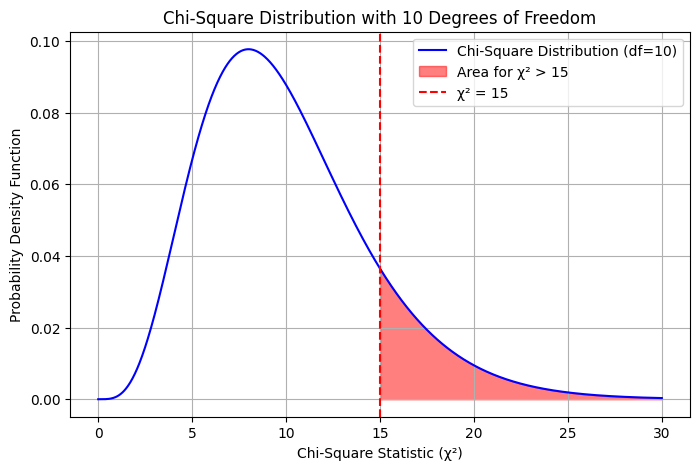

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters
df = 10  # Degrees of freedom
x_stat = 15  # Chi-square statistic to shade area

# Generate x values and corresponding y values for the chi-square distribution
x = np.linspace(0, 30, 1000)  # Range of x-axis
y = chi2.pdf(x, df)

# Plot the chi-square distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Chi-Square Distribution (df={df})", color="blue")

# Shade the area corresponding to chi-square statistic > 15
x_shade = np.linspace(x_stat, 30, 500)
y_shade = chi2.pdf(x_shade, df)
plt.fill_between(x_shade, y_shade, color="red", alpha=0.5, label=f"Area for χ² > {x_stat}")

# Add labels, legend, and grid
plt.title("Chi-Square Distribution with 10 Degrees of Freedom")
plt.xlabel("Chi-Square Statistic (χ²)")
plt.ylabel("Probability Density Function")
plt.axvline(x_stat, color="red", linestyle="--", label=f"χ² = {x_stat}")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Q7

In [7]:
import math
from scipy.stats import norm

# Given data
n = 1000          # Sample size
x = 520           # Number of people who prefer Coke
p_hat = x / n     # Sample proportion

# Z-value for 99% confidence interval
z_value = norm.ppf(0.995)  # 99% confidence level (two-tailed)

# Standard error
se = math.sqrt((p_hat * (1 - p_hat)) / n)

# Confidence interval
lower_bound = p_hat - z_value * se
upper_bound = p_hat + z_value * se

# Print results
print(f"Sample Proportion (p̂): {p_hat:.4f}")
print(f"Standard Error: {se:.4f}")
print(f"Z-Value for 99% CI: {z_value:.3f}")
print(f"99% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


Sample Proportion (p̂): 0.5200
Standard Error: 0.0158
Z-Value for 99% CI: 2.576
99% Confidence Interval: (0.4793, 0.5607)


### Q8

In [8]:
from scipy.stats import chi2

# Given data
observed = [45, 55]  # Observed frequencies: Tails and Heads
expected = [50, 50]  # Expected frequencies for a fair coin

# Calculate the chi-square statistic
chi_square_stat = sum((o - e)**2 / e for o, e in zip(observed, expected))

# Degrees of freedom
df = 1

# Critical value for alpha = 0.05
critical_value = chi2.ppf(0.95, df)

# p-value
p_value = 1 - chi2.cdf(chi_square_stat, df)

# Print results
print(f"Chi-Square Statistic: {chi_square_stat:.4f}")
print(f"Critical Value at 0.05 significance: {critical_value:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision
if chi_square_stat > critical_value or p_value < 0.05:
    print("Reject the null hypothesis: The coin is likely biased.")
else:
    print("Fail to reject the null hypothesis: The coin appears fair.")


Chi-Square Statistic: 1.0000
Critical Value at 0.05 significance: 3.8415
P-Value: 0.3173
Fail to reject the null hypothesis: The coin appears fair.


### Q9

In [9]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency Table
observed = np.array([[60, 140],  # Smoker
                     [30, 170]]) # Non-Smoker

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between smoking status and lung cancer diagnosis.")
else:
    print("Fail to reject the null hypothesis: No significant association between smoking status and lung cancer diagnosis.")


Chi-Square Statistic: 12.0573
P-Value: 0.0005
Degrees of Freedom: 1
Expected Frequencies:
[[ 45. 155.]
 [ 45. 155.]]
Reject the null hypothesis: There is a significant association between smoking status and lung cancer diagnosis.


### Q10

In [10]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency Table
observed = np.array([[200, 150, 150],  # U.S. Preferences
                     [225, 175, 100]]) # U.K. Preferences

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between chocolate preference and country of origin.")
else:
    print("Fail to reject the null hypothesis: No significant association between chocolate preference and country of origin.")


Chi-Square Statistic: 13.3937
P-Value: 0.0012
Degrees of Freedom: 2
Expected Frequencies:
[[212.5 162.5 125. ]
 [212.5 162.5 125. ]]
Reject the null hypothesis: There is a significant association between chocolate preference and country of origin.


### Q11

In [11]:
from scipy import stats
import math

# Given values
sample_mean = 72
population_mean = 70
sample_std = 10
n = 30
alpha = 0.05

# Calculate the t-statistic
t_stat = (sample_mean - population_mean) / (sample_std / math.sqrt(n))

# Degrees of freedom
df = n - 1

# Calculate the p-value for a two-tailed test
p_value = 2 * stats.t.cdf(-abs(t_stat), df)

# Results
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision based on significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the sample mean and 70.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the sample mean and 70.")


t-statistic: 1.0954
P-value: 0.2823
Fail to reject the null hypothesis: There is no significant difference between the sample mean and 70.
